<a href="https://colab.research.google.com/github/sab112/myfirstrepo/blob/master/myKmeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
#K mean clustering is used for unsupervised learing, i.e there is no target data. we need to group the data in clustering 
#this is done by, 
#1.putting K centrids(no. of clusters) at random place
#2.compute distence of every point from centrids and cluster them accordingly
#3.adjust centroids position such that it becomes the center of gravity
#4.again re-cluster every point based on thier distance with centroid
#5.adjust centroids
#6.again re-cluster...until data points stop changing clusters

#how to be sure, no.of k clusters chosen, is the right choice
# eg. 3 clusters, find sum of squared errors of each cluster. if you have 10 data points 10 clusters will have 0 as sse, less clusters = more sse
# right one is the elbow point(like hand).. ie fit the model with 1,2,3,..no.of clusters, get inertia_ (sse) and plot x=no. of clusters y=sse

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt


In [85]:
a=[['Rob',27,70000],
['Michael',29,90000],
['Mohan',29,61000],
['Ismail',28,60000],
['Kory',42,150000],
['Gautam',39,155000],
['David',41,160000],
['A[ndrea',38,162000],
['Brad',36,156000],
['Angelina',35,130000],
['Donald',37,137000],
['Tom',26,45000],
['Arnold',27,48000],
['Jared',28,51000],
['Stark',29,49500],
['Ranbir',32,53000],
['Dipika',40,65000],
['Priyanka',41,63000],
['Nick',43,64000],
['Alia',39,80000],
['Sid',41,82000],
['Abdul',39,58000]]

In [86]:
df = pd.DataFrame(a,columns=('Name','Age','Income($)'))
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,A[ndrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


Text(0, 0.5, 'Income($)')

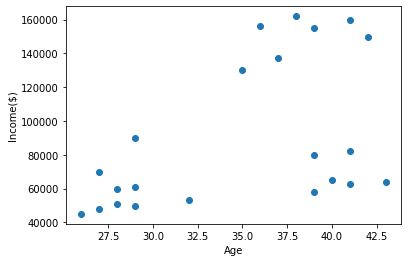

In [87]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [88]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [89]:
km.cluster_centers_       #position (x,y) of the centroid 

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [90]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


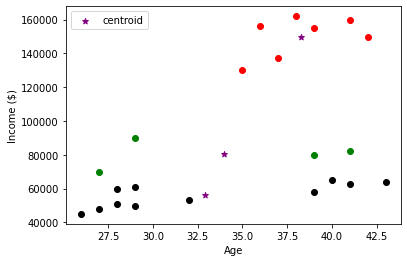

In [91]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')   #[:,0] all rows,column[0]..[:.1] column[1]
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [92]:
#model is not fit properly because of data
#we need to scale the data.. ie.. change to small values for both age and income.. as age in 10s and income in 10,000s
#fit & transform

scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
scaler1 = MinMaxScaler()
scaler1.fit(df[['Age']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [93]:
df['Income($)'] = scaler.transform(df[['Income($)']])
df['Age'] = scaler1.transform(df[['Age']])
df.head()          #both are in range 0 to 1

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


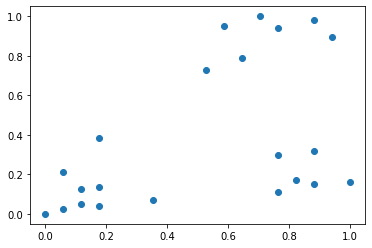

In [94]:
plt.scatter(df['Age'],df['Income($)'])

In [95]:
# train model with scaled data
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [96]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [97]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


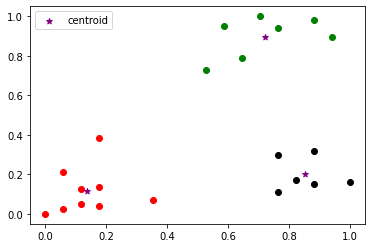

In [98]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [99]:
#how to be sure, no.of k clusters is the right one
#its is found by plotting sse (sun of squared errors) for each clusters chosen
#after training km.inertia_ will have the sse

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2621792762345213,
 0.21055478995472493,
 0.18173811754830893,
 0.1327661931978319,
 0.10663983840905436]

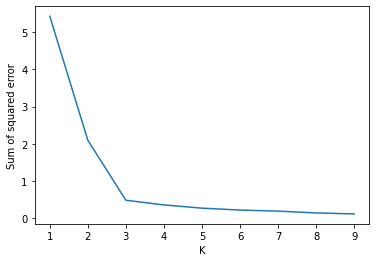

In [100]:
#now plot and see the elbow point in the line, it is the right cluster for this data
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)               #elbow point is at 3, so 3 is the right no. of xlusters